<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Salary_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [3]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 75.7kB/s]


In [4]:
!unzip '/content/salary-dataset-simple-linear-regression.zip' && rm '/content/salary-dataset-simple-linear-regression.zip'

Archive:  /content/salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/Salary_dataset.csv')
data.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
data.shape

(30, 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [9]:
data.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [10]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [11]:
np.round(data.describe(),2)

,Unnamed: 0,YearsExperience,Salary
count,30.00,30.00,30.00
mean,14.50,5.41,76004.00
std,8.80,2.84,27414.43
min,0.00,1.20,37732.00
25%,7.25,3.30,56721.75
50%,14.50,4.80,65238.00
75%,21.75,7.80,100545.75
max,29.00,10.60,122392.00


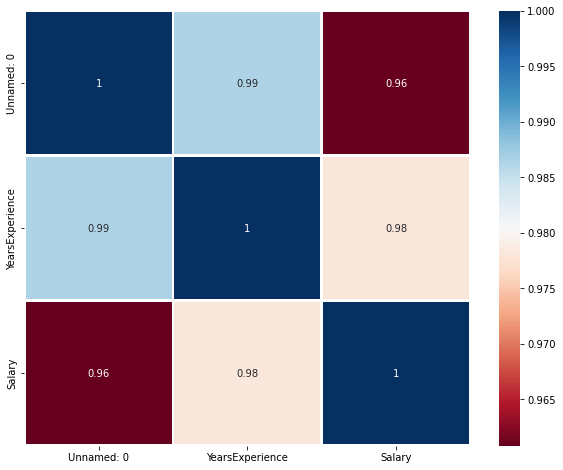

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),linecolor='white', annot=True, linewidths=2, cmap='RdBu')

In [13]:
px.box(data,y='Salary', points="all",notched=True, title="Describe of Salary´s column")


In [14]:
px.box(data,y='YearsExperience', points="all",notched=True, title="Describe of Years experience column")

# **MACHINE LEARNING MODELS**

In [15]:
x = np.array(data['YearsExperience'])
y = np.array(data['Salary'])

In [23]:
print(x.shape)
print(y.shape)

(30,)
(30,)


In [16]:
px.scatter(x=x,y=y, trendline='ols', title='Scatter chart Salary and Years Exprecience')

In [17]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [24]:
print(x_train.shape)
print(y_train.shape)

(24, 1)
(24,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [19]:
x_train= x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

features = np.array([[5.5]]) #features YearsExperence

reg = LinearRegression()
reg.fit(x_train,y_train)
LR = reg.predict(features)
LR

array([76211.18575614])

In [20]:
from sklearn.ensemble import RandomForestRegressor

features = np.array([[5.5]]) #features YearsExperence

reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
RF = reg_rf.predict(features)
RF

array([71483.715])

In [21]:
from sklearn.svm import SVR

features = np.array([[5.5]]) #features YearsExperence
                    
reg_svr = SVR()
reg_svr.fit(x_train, y_train)
SvR= reg_svr.predict(features)
SvR

array([62170.34721703])

In [22]:
from sklearn.neighbors  import KNeighborsRegressor

features = np.array([[5.5]]) #features YearsExperence

reg_knn = KNeighborsRegressor()
reg_knn.fit(x_train, y_train)
KNR = reg_knn.predict(features)
KNR

array([71905.8])